In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r'C:\Users\AmiteshOP\Downloads\placement.csv')

In [4]:
df.head(4)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1


C:\Users\AmiteshOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cgpa', ylabel='Density'>

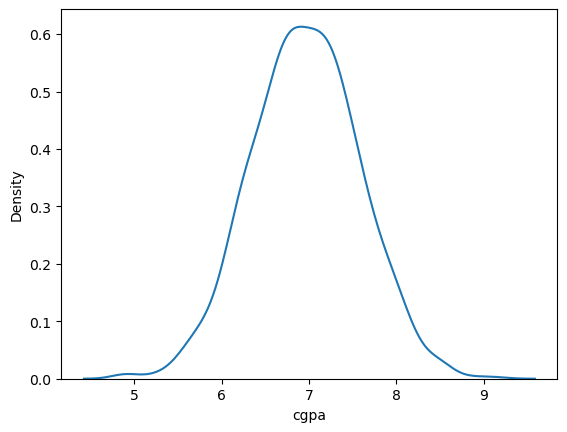

In [11]:
sns.distplot(df['cgpa'],hist=False)

C:\Users\AmiteshOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


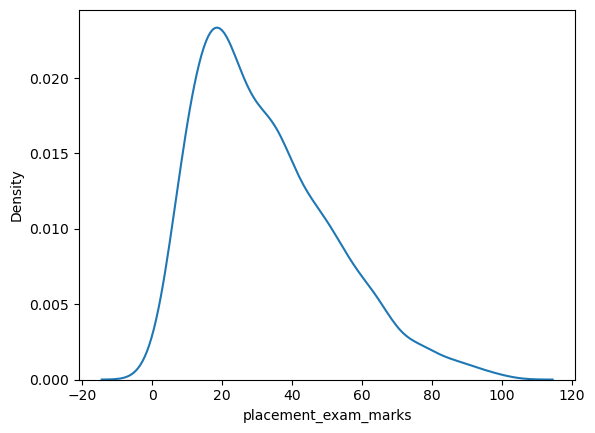

In [13]:
sns.distplot(df['placement_exam_marks'],hist=False);

In [14]:
print('mean values of cgpa',df['cgpa'].mean())
print('std values of cgpa',df['cgpa'].std())
print('min values of cgpa',df['cgpa'].min())
print('max values of cgpa',df['cgpa'].max())

mean values of cgpa 6.96124000000001
std values of cgpa 0.6158978751323894
min values of cgpa 4.89
max values of cgpa 9.12


In [16]:
# finding boundary values

print('highest allowed',df['cgpa'].mean()+3*df['cgpa'].std())
print('lowest allowed',df['cgpa'].mean()-3*df['cgpa'].std())

highest allowed 8.808933625397177
lowest allowed 5.113546374602842


In [17]:
# finding the outliers

df[(df['cgpa'] > 8.80 ) | (df['cgpa']< 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# trimming

In [31]:
df1= df[(df['cgpa'] < 8.80 ) & (df['cgpa']> 5.11)]

In [32]:
df1

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [20]:
df.shape

(1000, 3)

In [33]:
df1.shape

(995, 3)

In [34]:
# approch 2

# calcilate the Zscore

df['cgpa_score'] = (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [36]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [43]:
df[(df['cgpa_score'] > 3) | (df['cgpa_score'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [44]:
# triming

df3 = df[(df['cgpa_score'] < 3) & (df['cgpa_score'] > -3)]

In [45]:
df3

,cgpa,placement_exam_marks,placed,cgpa_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# capping

In [46]:
upper_limit = df['cgpa'].mean() + 3 *df['cgpa'].std()
lower_limit = df['cgpa'].mean() -3 * df['cgpa'].std()

In [51]:
upper_limit

8.808933625397177

In [50]:
lower_limit

5.113546374602842

In [47]:
df['cgpa']= np.where(
    df['cgpa']> upper_limit,
    upper_limit,
    np.where(df['cgpa']<lower_limit,
             lower_limit,
            df['cgpa']))

In [48]:
df.shape

(1000, 4)

C:\Users\AmiteshOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


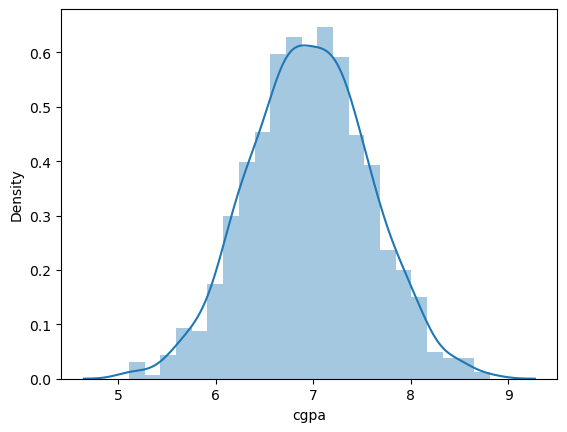

In [49]:
 sns.distplot(df['cgpa']);

In [53]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64